# **IMDB dataset**

La base de datos IMDB (Internet Movie Database), se compone de 50,000 críticas de películas, donde 25,000 críticas conforman el conjunto de entrenamiento y 25,000 constituyen el conjunto de prueba. En cada conjunto, el 50% de las críticas son positivas y el restante 50% son negativas. Sitio web de IMDB: https://www.imdb.com/<br>
La base de datos IMDB viene precargada en Keras:

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

El argumento num_word=10000, indica que sólo se tomarán en cuenta las 10,000 palabras más usuales dentro de la base de datos (mas  comunes o populares de forma general), esto con la intención de tener instancias de un tamaño más manejable.

train_data y test_data son listas de críticas, donde cada crítica se compone de valores enteros, los cuales son el índice de alguna palabra en particular. Por su parte, train_labels y test_labels, son listas de 0's y 1's, donde 0 representa que la crítica es negativa y 1 que es positiva.

In [7]:
# Ejemplo de una critica, el texto ya se convirtio en numeros, nos ahorraron un paso
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
# Cuantas palabras tiene la critica numero 23573   | Todas tienen longitud diferente
len(train_data[23573]) 

169

In [5]:
#La crítica 456 del conjunto de entrenamiento es negativa.
train_labels[456] 

0

Dado que establecimos la restricción de utilizar solamente las 10,000 palabras más usuales, ninguno de los índices que constituyen cada crítica, puede tener un valor mayor a 10,000:

In [8]:
# Ir guardando el indice mayor, para no superar las 10,000 palabras 
max([max(sequence) for sequence in train_data])

9999

El código siguiente permite decodificar las críticas (convertir el numero a texto):

In [9]:
#word_index es un diccionario que permite mapear cada palabra a su respectivo índice
word_index = imdb.get_word_index()
# Aplicamos la operación inversa, es decir, mapeamos de índices a palabras.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #dict significa dictionary, y te devuelve una lista de tuplas pares, donde
#el primer valor de la lista, representa la clave o ID, y el segundo valor denota el valor de dicha clave.
# Procedemos a decodificar la crítica. La razón por la que a cada índice le restamos 3, es
#porque 0, 1 y 2 son índices reservados para los valores de "padding", "comienzo de la secuencia" y "desconocido".
# El argumento "?" se regresa en caso de que el índice en cuestión no tenga asociado ninguna palabra.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[23000]])

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
# Imprimir la critica. el signo de interrogacion quiere decir una palabra desconocida 
decoded_review

"? this movie should be required viewing for all ? or would be ? all of the best lines are directly related to ? the public library vs academic library argument is a classic argument ? among ? and library school students it also breaks many ? stereotypes ? might even be capable of having fun even if they don't usually have sex in the romance languages section the best movie about ? desk set with ? hepburn and spencer tracy of course"

# **Preprocesamiento de los datos**

Aplicamos el enfoque de one-hot encoding a los datos de entrada. Por ejemplo, si una de nuestras instancias se representa por la lista [2, 7, 15], al aplicar one-hot encoding, dicha lista se convertirá en un vector de 10,000 elementos, donde a los índices 2, 7 y 15, se les asignará el valor de 1. En el problema que estamos abordando, todas las listas de críticas se transforman en vectores de 10,000 elementos, debido a que el número máximo de palabras que se están considerando, son 10,000. <br>
La razón por la que se aplica esta operación en los datos de entrada, es porque las redes neuronales convolucionales no reciben como entrada listas de valores, sino tensores.<br>
Ejemplo:

**Crítica 1 -> [2, 7, 15]** <br>
**One-hot encoding de la crítica -> [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ... , 0]** <br>
**Crítica 2-> [9, 7, 1, 2, 7]** <br>
**One-hot encoding de la crítica -> [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ... , 0]**

In [11]:
for i in range(5):
  print(len(train_data[i]))

218
189
141
550
147


In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): #sequences se refiere al conjunto de críticas
    # Creamos matrices de ceros con dimensiones (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension)) #-> 25,000 X 10,000
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # le asignamos el valor de uno al índice correspondiente
    return results

# Conjunto de entrenamiento vectorizado/one-hote encoding
x_train = vectorize_sequences(train_data)
# Conjunto de prueba vectorizado/one-hote encoding
x_test = vectorize_sequences(test_data)

In [13]:
# Prueba de codificacion One Hot
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
# Longitud del dato (10000)
len(x_train[1])

10000

In [15]:
# Tamaño del vector
x_train[1].shape

(10000,)

In [16]:
x_train.shape

(25000, 10000)

In [17]:
x_train[15879]

array([0., 1., 1., ..., 0., 0., 0.])

También convertimos las etiquetas en tensores:

In [20]:
# Etiquetas vectorizadas, convertir a punto flotante
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
y_train[3]

1.0

# **Construcción de la red neuronal**

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #Capa oculta 1 - input_shape puede verse como una representación implícita de la capa de entrada
model.add(layers.Dense(16, activation='relu'))# Capa oculta 2
model.add(layers.Dense(1, activation='sigmoid'))#Capa de salida

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# **Compilación**

In [24]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), #Es una variación del descenso de gradiente
              loss='binary_crossentropy', #Se relaciona a la función de error 
              metrics=['accuracy'])

# **Validación**

Buscando evaluar el rendimiento del modelo durante la fase de entrenamiento, construimos el conjunto de validación a partir del conjunto de entrenamiento.

In [28]:
#Instancias
x_val = x_train[:10000] #Instancias de validación
#x_val = x_train[0:10000]
partial_x_train = x_train[10000:] #Instancias de entrenamiento
#partial_x_train = x_train[10000:25000] #Instancias de entrenamiento

#Etiquetas
y_val = y_train[:10000] #Etiquetas de validación  
#y_val = y_train[0:10000] #Etiquetas de validación  
partial_y_train = y_train[10000:] #Etiquetas de entrenamiento
#partial_y_train = y_train[10000:25000] #Etiquetas de entrenamiento

In [29]:
#Conjunto de entrenamiento
len(partial_x_train)

15000

In [30]:
#Conjunto de validación
len(x_val)

10000

# **Entrenamiento**

In [31]:
epochs_num = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs_num,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.5264 - accuracy: 0.7864 - val_loss: 0.4098 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3261 - accuracy: 0.9000 - val_loss: 0.3456 - val_accuracy: 0.8619
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2387 - accuracy: 0.9241 - val_loss: 0.2826 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1895 - accuracy: 0.9399 - val_loss: 0.3093 - val_accuracy: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1531 - accuracy: 0.9523 - val_loss: 0.2777 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1274 - accuracy: 0.9623 - val_loss: 0.2864 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1091 - accuracy: 0.9675 - val_loss: 0.3045 - val_accuracy: 0.8833
Epoch 8/20
30

Podemos ver que la llamada al método fit(), genera un objeto History, el cual tiene un miembro history, que a su vez es un diccionario que contiene información acerca de todo el proceso de entrenamiento.

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Graficamos el desempeño de la red neuronal durante la fase de entrenamiento. A continuación se muestra la comparación entre la pérdida que ocurre en el conjunto de entrenamiento y la pérdida relacionada al conjunto de validación. 

Best accuracy epoch  3
Best loss epoch  5


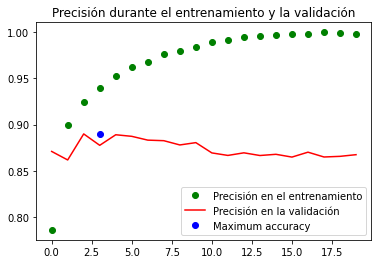

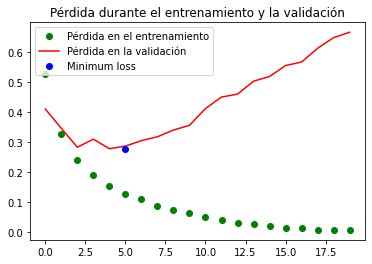

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

#Precisión
plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print('Best accuracy epoch ', max_val_acc_epoch)
plt.figure()

#Pérdida
plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Best loss epoch ', min_val_loss_epoch)

plt.show()

Con base a las gráficas previas, podemos observar que, aproximadamente a partir de la época 4, el modelo deja de mejorar y comienza a presentarse una disminución en su rendimiento.

# **Overfitting - Sobreajuste:**<br>
Esto ocurre cuando el desempeño del modelo en el conjunto de entrenamiento es superior al rendimiento del mismo modelo en el conjunto de validación.<br>
Para mitigar el overfitting, debemos buscar que el rendimiento del modelo tanto en el conjunto de entrenamiento como en el conjunto de validación, sea similar y con valores apropiados.

# **Re-entrenamiento y evaluación del modelo final** 

Una vez que se seleccionó el modelo tomando como base el rendimiento de este en el conjunto de validación, una práctica recomendada es volver a entrar la arquitectura con los mismos parámetros con los que se generó el modelo seleccionado y con el conjunto de entrenamiento original, es decir, integrado el conjunto de validación al conjunto de entrenamiento "parcial". 

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo en el conjunto de entrenamiento original
model.fit(x_train, y_train, epochs=4, batch_size=512)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4523 - accuracy: 0.8200
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2575 - accuracy: 0.9110
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1985 - accuracy: 0.9299
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1680 - accuracy: 0.9406


In [35]:
#Evaluamos el modelo final
loss_test, acc_test = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3032 - accuracy: 0.8808


In [36]:
print(loss_test, acc_test)

0.3032461404800415 0.8807600140571594


# **Predicciones del modelo final**

Luego de generar un modelo apropiado para clasificar críticas, podemos usarlo para predecir la probabilidad de que cada nueva crítica que sea leída por el modelo, se clasifique como positiva o negativa. Este proceso predictivo es muy importante, ya que así es como se desplegaría esta red neuronal en "la vida real", es decir, en algún servicio de consumo.

In [37]:
model.predict(x_test)

array([[0.19181818],
       [0.99959236],
       [0.9439026 ],
       ...,
       [0.15047577],
       [0.10961464],
       [0.6663536 ]], dtype=float32)

In [38]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

**NOTA:** La información presentada en este notebook, fue tomada de https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb. La única variación sutil del presente notebook con respecto a la fuente original, tiene que ver con la descripción de ciertas partes del código.